In [1]:
import pandas as pd
import numpy as np

import importlib
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import  train_test_split
from sklearn.model_selection import GridSearchCV

import pickle

import gzip

In [2]:
import os
os.chdir('../../')
from functions.model_wrapper import Tree_Model, rfm_params

In [3]:
with gzip.open('data/gzipX_train_transformed.pckl', 'rb') as f:
    X_train_transformed = pickle.load(f)
with gzip.open('data/gzipX_val_transformed.pckl', 'rb') as f:
    X_val_transformed = pickle.load(f)  
with gzip.open('data/gzipX_holdout_transformed.pckl', 'rb') as f:
    X_holdout_transformed = pickle.load(f)  


with gzip.open('data/gzipy_train.pckl', 'rb') as f:
    y_train = pickle.load(f)
with gzip.open('data/gzipy_val.pckl', 'rb') as f:
    y_val = pickle.load(f)
with gzip.open('data/gzipy_holdout.pckl', 'rb') as f:
    y_holdout = pickle.load(f)

rfm requires parameter tuning.  In simplest case, two parameters:  Depth of trees and maximum number of features the model has access to when building a tree. 

In [4]:
# For the purpose of Grid Search, I recreate the full data set to use.
X_all = pd.concat([X_train_transformed, X_val_transformed, X_holdout_transformed])
y_all = pd.concat([y_train, y_val, y_holdout])

In [5]:
parameters = {'max_depth' : [250, 500, 1000],
              'max_features' : [0.7, 0.6, 0.5, 'sqrt', 'log2'],
             }
# I reduced the number of estimators and n_jobs for grid search
rfm_params["n_estimators"] = 40
rfm_params["n_jobs"] = 2
rfm_params["verbose"] = 0

In [15]:

rfm = RandomForestRegressor()
rfm.set_params(**rfm_params)
clf_rmse = GridSearchCV(rfm, parameters, scoring = 'neg_root_mean_squared_error', cv = 4)
clf_rmse.fit(X_val_transformed, y_val.values)

GridSearchCV(cv=4,
             estimator=RandomForestRegressor(max_depth=300, max_features=0.5,
                                             n_estimators=40, n_jobs=2,
                                             oob_score=True),
             param_grid={'max_depth': [250, 500, 1000],
                         'max_features': [0.7, 0.6, 0.5, 'sqrt', 'log2']},
             scoring='neg_root_mean_squared_error')

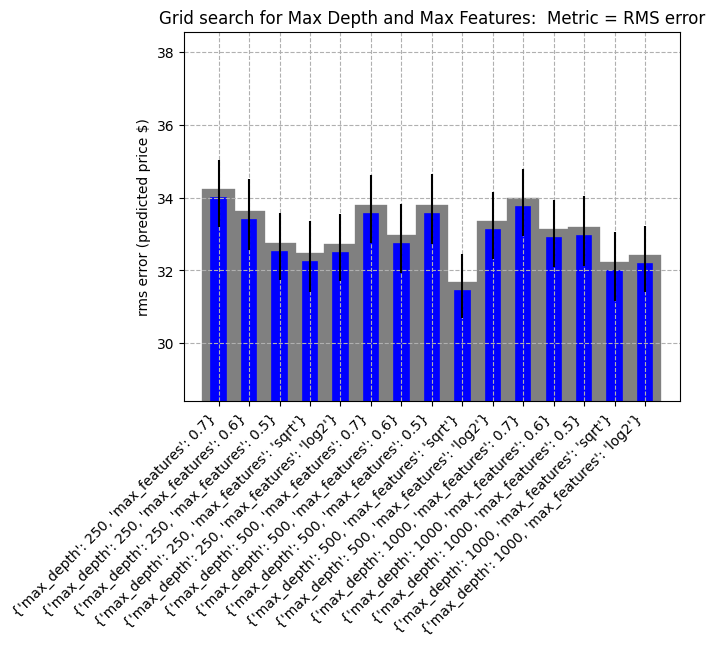

In [16]:
plt.title("Grid search for Max Depth and Max Features:  Metric = RMS error")
xlabels = [x for x in map(str, clf_rmse.cv_results_["params"])]
plt.bar(xlabels, 
        height = -clf_rmse.cv_results_["mean_test_score"],
        yerr=clf_rmse.cv_results_["std_test_score"]/10,
        color = ['blue'],
        edgecolor = ['grey'],
        linewidth = 6
       )
plt.ylabel("rms error (predicted price $)")
plt.xticks(rotation = 45, horizontalalignment="right")
plt.ylim(-clf_rmse.cv_results_["mean_test_score"].max()*0.9, -clf_rmse.cv_results_["mean_test_score"].min()*1.13)
plt.grid(linestyle = "--")
plt.show()


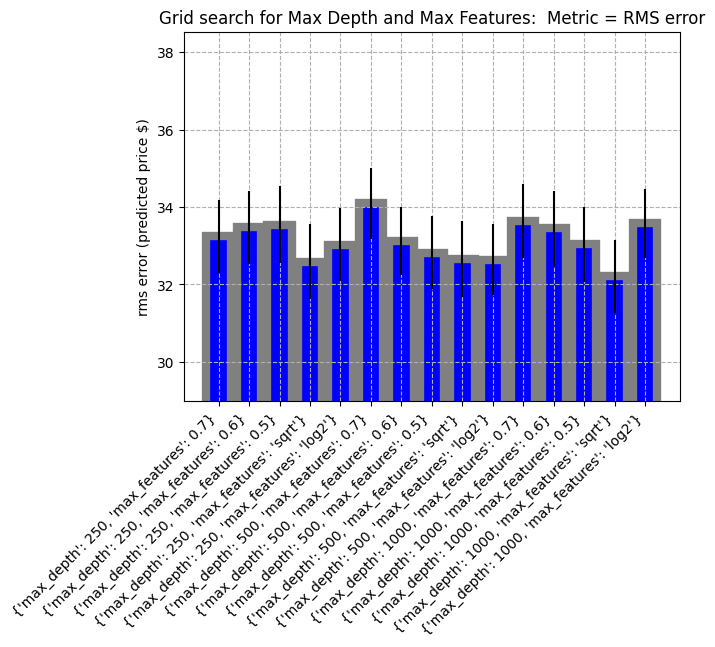

In [12]:
plt.title("Grid search for Max Depth and Max Features:  Metric = RMS error")
xlabels = [x for x in map(str, clf_rmse.cv_results_["params"])]
plt.bar(xlabels, 
        height = -clf_rmse.cv_results_["mean_test_score"],
        yerr=clf_rmse.cv_results_["std_test_score"]/10,
        color = ['blue'],
        edgecolor = ['grey'],
        linewidth = 6
       )
plt.ylabel("rms error (predicted price $)")
plt.xticks(rotation = 45, horizontalalignment="right")
plt.ylim(-clf_rmse.cv_results_["mean_test_score"].max()*0.9, -clf_rmse.cv_results_["mean_test_score"].min()*1.13)
plt.grid(linestyle = "--")
plt.show()


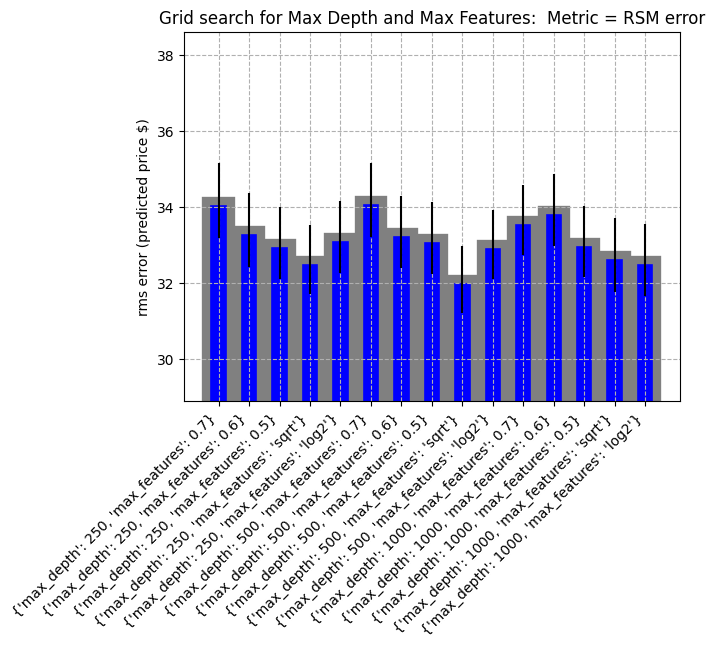

In [7]:
plt.title("Grid search for Max Depth and Max Features:  Metric = RMS error")
xlabels = [x for x in map(str, clf_rmse.cv_results_["params"])]
plt.bar(xlabels, 
        height = -clf_rmse.cv_results_["mean_test_score"],
        yerr=clf_rmse.cv_results_["std_test_score"]/10,
        color = ['blue'],
        edgecolor = ['grey'],
        linewidth = 6
       )
plt.ylabel("rms error (predicted price $)")
plt.xticks(rotation = 45, horizontalalignment="right")
plt.ylim(-clf_rmse.cv_results_["mean_test_score"].max()*0.9, -clf_rmse.cv_results_["mean_test_score"].min()*1.13)
plt.grid(linestyle = "--")
plt.show()

In [19]:
# Use R^2 as a metric for grid search
clf_r2 = GridSearchCV(rfm, parameters, scoring = 'r2', cv = 8)
clf_r2.fit(X_val_transformed, y_val.values)

GridSearchCV(cv=8,
             estimator=RandomForestRegressor(max_depth=300, max_features=0.5,
                                             n_estimators=40, n_jobs=2,
                                             oob_score=True),
             param_grid={'max_depth': [250, 500, 1000],
                         'max_features': [0.7, 0.6, 0.5, 'sqrt', 'log2']},
             scoring='r2')

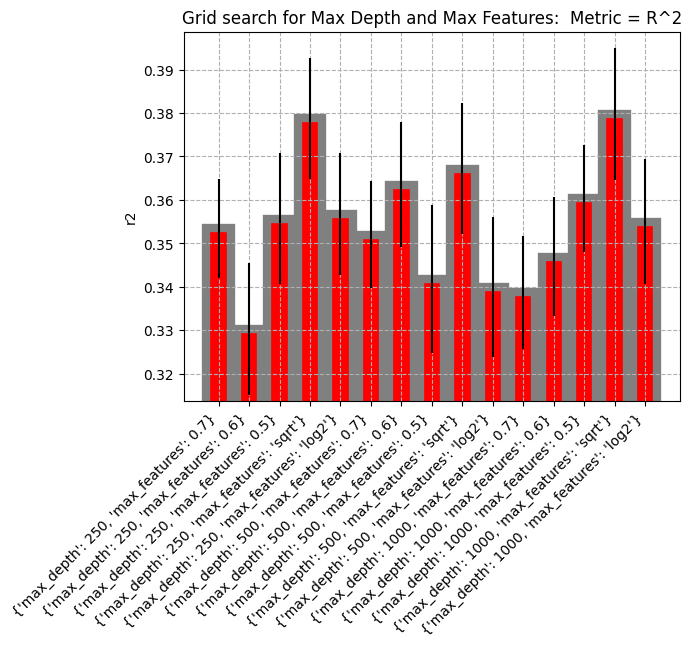

In [18]:
plt.title("Grid search for Max Depth and Max Features:  Metric = R^2")
plt.bar(xlabels, 
        clf_r2.cv_results_["mean_test_score"], 
        yerr=clf_r2.cv_results_["std_test_score"]/10,
        color = ['r'],
        edgecolor = ['grey'],
        linewidth = 6
       )
plt.ylabel(clf_r2.scoring)
plt.xticks(rotation = 45, horizontalalignment="right")
plt.ylim(clf_r2.cv_results_["mean_test_score"].min()*0.95, clf_r2.cv_results_["mean_test_score"].max()*1.05)
plt.grid(linestyle = "--")
plt.show()

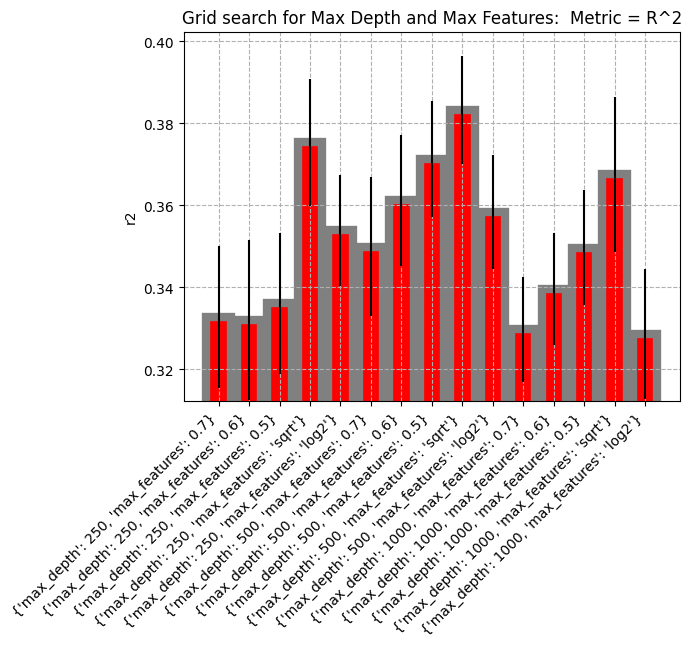

In [14]:
plt.title("Grid search for Max Depth and Max Features:  Metric = R^2")
plt.bar(xlabels, 
        clf_r2.cv_results_["mean_test_score"], 
        yerr=clf_r2.cv_results_["std_test_score"]/10,
        color = ['r'],
        edgecolor = ['grey'],
        linewidth = 6
       )
plt.ylabel(clf_r2.scoring)
plt.xticks(rotation = 45, horizontalalignment="right")
plt.ylim(clf_r2.cv_results_["mean_test_score"].min()*0.95, clf_r2.cv_results_["mean_test_score"].max()*1.05)
plt.grid(linestyle = "--")
plt.show()

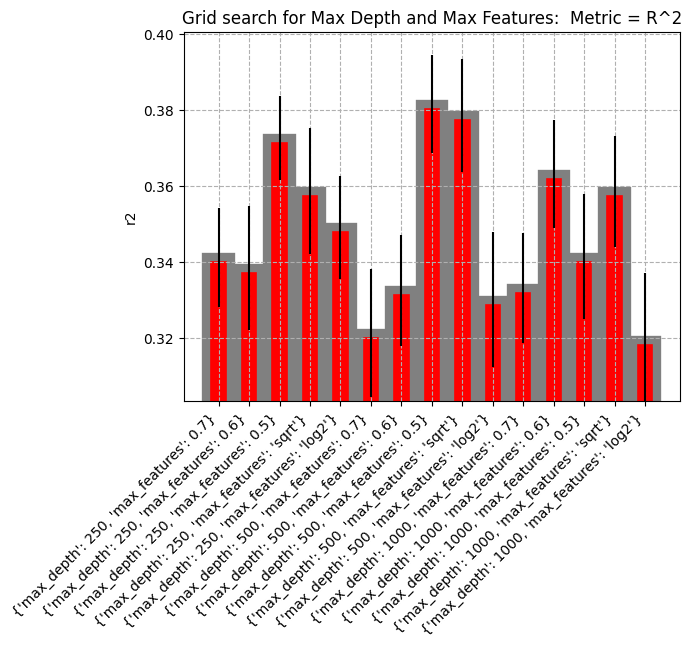

In [20]:
plt.title("Grid search for Max Depth and Max Features:  Metric = R^2")
plt.bar(xlabels, 
        clf_r2.cv_results_["mean_test_score"], 
        yerr=clf_r2.cv_results_["std_test_score"]/10,
        color = ['r'],
        edgecolor = ['grey'],
        linewidth = 6
       )
plt.ylabel(clf_r2.scoring)
plt.xticks(rotation = 45, horizontalalignment="right")
plt.ylim(clf_r2.cv_results_["mean_test_score"].min()*0.95, clf_r2.cv_results_["mean_test_score"].max()*1.05)
plt.grid(linestyle = "--")
plt.show()

## Grid Search Results
#### There are two somewhat surprising results.
#### 1.  Too high a Max Depth would offer lead to overfit models. However in our case, it appears that this makes very little difference.   Perhaps this is because there are so many columns of features (>3000).  Since it makes little difference, we are going with the smallest <em>max_depth</em> of 250.

#### 2.  The <em>max_feature</em> parameter adjust the max number of features allowed in each tree.  This is a method of <em>regularization</em> to avoid the over-reliance on the strong features.  We have about 3000 features, so the log2 and sqrt values are 12 and 55 respectively.  Therefore in most trees we are probably excluding to many strong predictors (features) in them.  These yielded poorer results than the higher <em>max_feature</em> results.  

#### At the end, I selected <em>max_depth</em> = 500 and <em>max_feature</em> = 0.5 because that combination yielded the highest r2 and 3rd lowest rms error of the parameter combination in this search.


In [7]:
rfm_params["n_estimators"] = 2000
rfm_params["n_jobs"] = 4
rfm_params["max_depth"] = 250
rfm_params["max_features"] = 'sqrt'
rfm_params["verbose"] = 1

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  8.8min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 12.7min
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed: 14.2min finished


Finished fitting.  Predicting X...


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    7.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   14.6s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:   23.1s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:   33.2s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:   36.6s finished


Finished predicting X.
Training MdAPE is 7.962500000000006% (not holdout).
Finished training mdoel
MdAPE is 7.962500000000006%
R2: 0.880, RMSE: 14.187, MAE: 4.195
Plotting scatter plot..


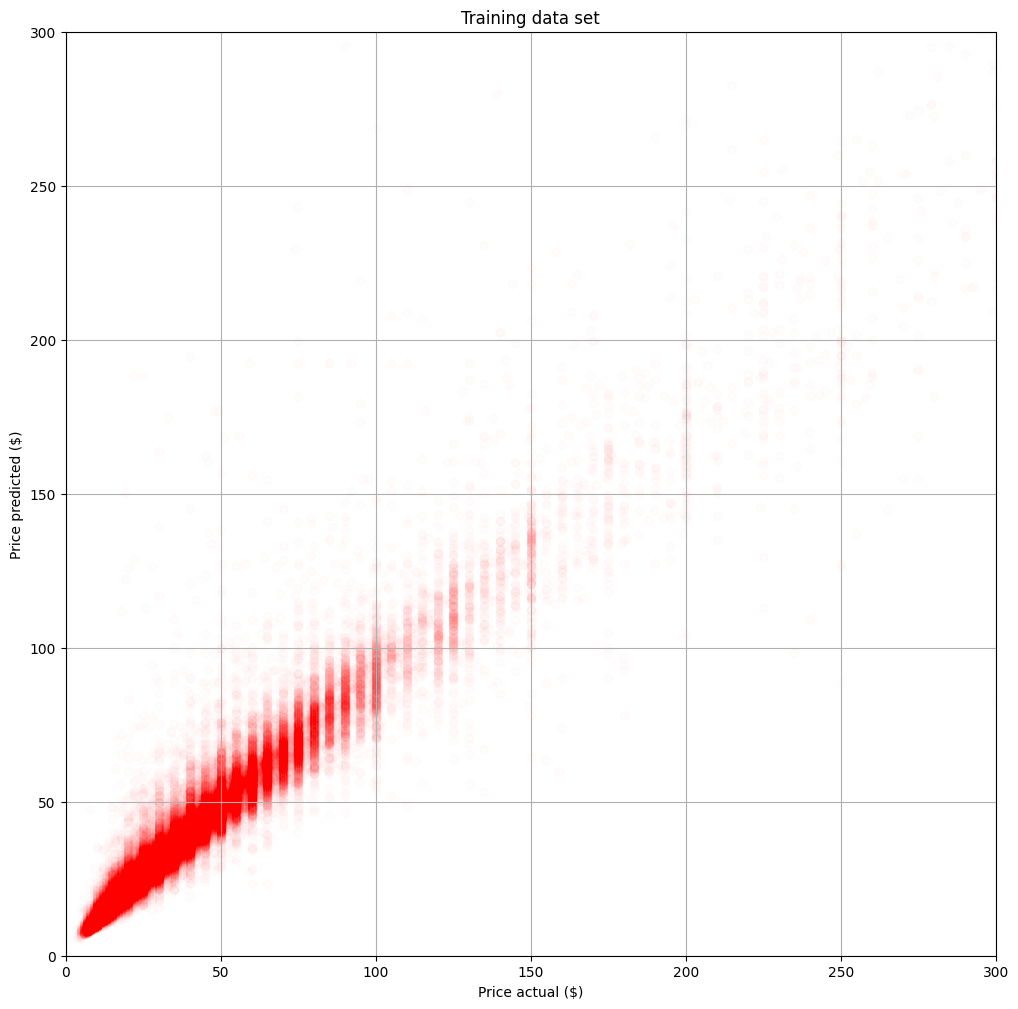

RandomForestRegressor(max_depth=250, max_features='sqrt', n_estimators=2000,
                      n_jobs=4, oob_score=True, verbose=1)

In [8]:
rfm = Tree_Model(Model = RandomForestRegressor,
                 params = rfm_params
                 )

rfm.fit(X_train_transformed, y_train)

In [9]:
with open('data/rfm_model_2000.pckl', 'wb') as f:
    pickle.dump(rfm, f)

# with open('data/rfm_model_2000.pckl', 'rb') as f:
#     gbm = pickle.load(f)

In [10]:
trained_xgboost_model = rfm.model

In [12]:
feature_importances = rfm.feature_imp
with open('data/feature_importances_rfm2000.pckl', 'wb') as f:
    pickle.dump(feature_importances, f)

In [13]:
# with open('data/feature_importances_rfm2000.pckl', 'rb') as f:
#     feature_importances = pickle.load(f)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:   10.0s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:   14.8s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:   17.3s finished


MdAPE is 20.587083333333325%
R2: 0.438, RMSE: 38.517, MAE: 10.467
Plotting scatter plot..


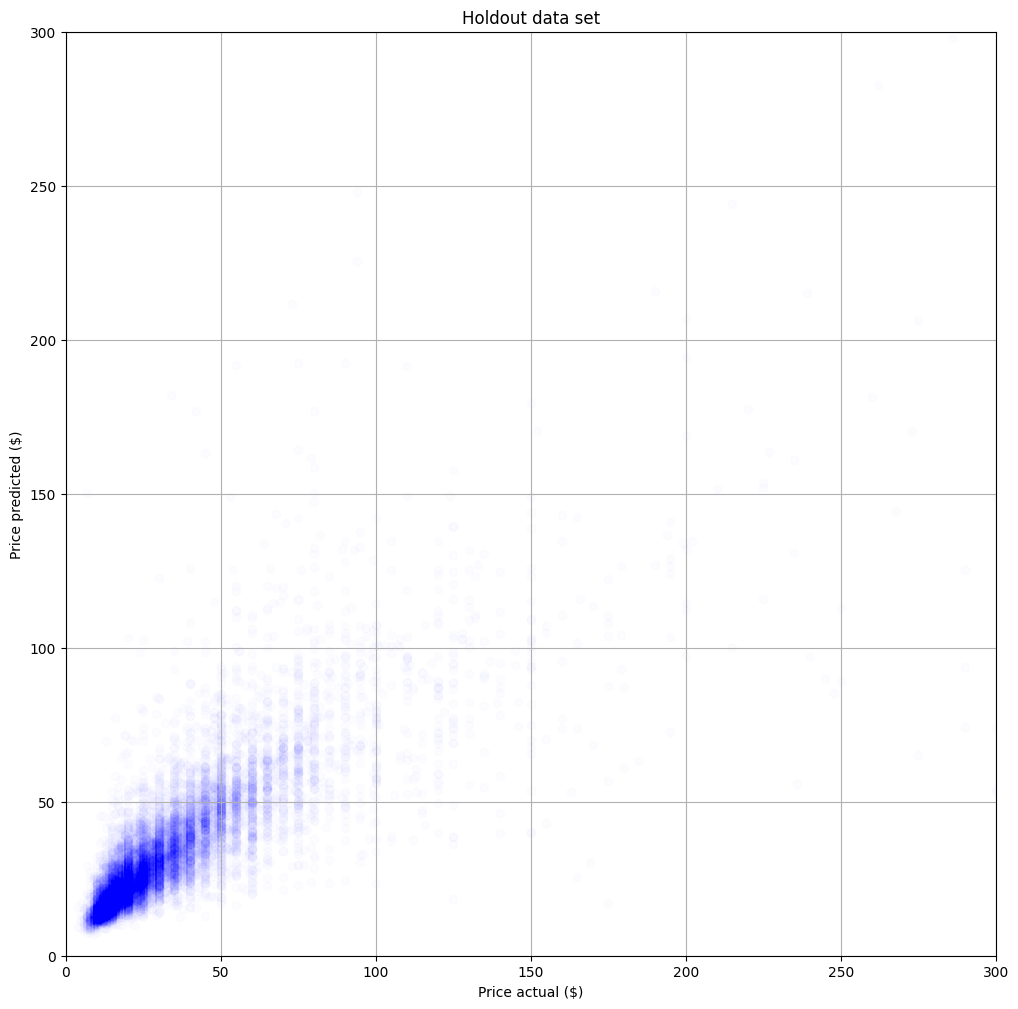

In [14]:
y_pred = rfm.predict(X_holdout_transformed, y_holdout)

In [15]:
feature_importances

[('norm-points', 0.2797199011880107),
 ('title_2013', 0.014404097639239529),
 ('title_2009', 0.014323660872434692),
 ('merged_Napa', 0.009890947300519736),
 ('title_2014', 0.00953908237943844),
 ('title_haut', 0.009223343793864771),
 ('title_2010', 0.009191670543277543),
 ('title_2011', 0.009161781252127592),
 ('title_2005', 0.00861976260433605),
 ('title_2012', 0.007977383929440078),
 ('province_Burgundy', 0.0077358154224625945),
 ('title_2007', 0.007697961280602202),
 ('title_rose', 0.007626185151926286),
 ('title_2006', 0.006745564348129853),
 ('merged_Champagne', 0.0060615914453065085),
 ('region-1_Chevalier-Montrachet', 0.005991314259518402),
 ('merged_Médoc', 0.00598007829995487),
 ('merged_Noir', 0.005973273339232293),
 ('winery_Joullian', 0.00589452931041481),
 ('title_2008', 0.005744207571316945),
 ('merged_Blanc', 0.005680784027005986),
 ('merged_Domaine', 0.005634034871830437),
 ('merged_Red', 0.005297167907063228),
 ('title_clos', 0.005242385985587125),
 ('region-1_Brunello

In [16]:
print("\u0332".join("RANK   FEATURE                       IMPORTANCE "))
importances = 0
for rank, (feature, importance) in enumerate(feature_importances[:40]):
    feature = feature.split("_")[-1]
    print(f"{str(rank+1).zfill(4)}   {feature}", end = " ")
    feature_text_length = len(feature)
    padding_length = 30 - feature_text_length
    for padding in range(padding_length):
        print(end = " ")
    print(str(np.round(importance, 5)))
    importances += importance

R̲A̲N̲K̲ ̲ ̲ ̲F̲E̲A̲T̲U̲R̲E̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲ ̲I̲M̲P̲O̲R̲T̲A̲N̲C̲E̲ 
0001   norm-points                    0.27972
0002   2013                           0.0144
0003   2009                           0.01432
0004   Napa                           0.00989
0005   2014                           0.00954
0006   haut                           0.00922
0007   2010                           0.00919
0008   2011                           0.00916
0009   2005                           0.00862
0010   2012                           0.00798
0011   Burgundy                       0.00774
0012   2007                           0.0077
0013   rose                           0.00763
0014   2006                           0.00675
0015   Champagne                      0.00606
0016   Chevalier-Montrachet           0.00599
0017   Médoc                          0.00598
0018   Noir                           0.00597
0019   Joullian                       0.00589
0020   2008                     

In [43]:
importances

0.9999999999999983